In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [6]:
data_x = pd.read_csv('D:\movie\Movie_collection_Independent.csv')

In [7]:
data_y = pd.read_csv("D:\movie\Movie_collection_Target.csv")

In [8]:
data_x.head()

,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,3D_available,Genre_Thriller,Genre_Drama,Genre_Comedy
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,1,1,0,0
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,0,0,0,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,0,0,1,0


In [9]:
data_y.head()

,Collection
0,2.266667
1,2.106667
2,2.980000
3,2.893333
4,3.080000


In [10]:
data_x.shape

(506, 19)

In [11]:
data_y.shape

(506, 1)

In [12]:
data_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketin_expense     506 non-null    float64
 1   Production_expense   506 non-null    float64
 2   Multiplex_coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  Time_taken           506 non-null    float64
 12  Twitter_hastags      506 non-null    float64
 13  Avg_age_actors       506 non-null    int64  
 14  Num_multiplex        506 non-null    int64  
 15  3D_available         506 non-null    int

In [13]:
data_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Collection  506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [14]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(data_x, data_y, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [15]:
X_train.shape, X_valid.shape, X_test.shape

((284, 19), (95, 19), (127, 19))

In [16]:
y_train.shape, y_valid.shape, y_test.shape

((284, 1), (95, 1), (127, 1))

In [17]:
# Standardizing
# a process in which --> we subtract the mean of each varriable from there individual values and then
# also divided by the varriance --> becuase at the end we want all the varriables with mean as '0' and varriance as '1'

# standard procedure to create any ML Model

# scaler is trained on training dataset only becuase we do ot want information from test/valid set to influence model training

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
# fitting the scaler object on trainign data
X_train = scaler.fit_transform(X_train) # scaler will find values to subtract as a mean and to divide as a varriance
X_valid = scaler.transform(X_valid) # transforming validation set using the sclaer object fitted on X_train
X_test = scaler.transform(X_test) # transforming test set using the sclaer object fitted on X_train

In [18]:
# to generate the same result everytime the code is being runned
np.random.seed(42)
tf.random.set_seed(42)

In [19]:
X_train.shape, X_valid.shape, X_test.shape

((284, 19), (95, 19), (127, 19))

In [20]:
# Sequential API

model = keras.models.Sequential([
    keras.layers.Dense(30,activation="relu",input_shape=[19]), #first_layer
    keras.layers.Dense(30,activation="relu"), # second_layer
    keras.layers.Dense(1)]) #output_layer

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                600       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 1,561
Trainable params: 1,561
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(loss="mean_squared_error", # square of the difference of predicted value & actual value
              optimizer=keras.optimizers.SGD(learning_rate=1e-3), # learnign rate --> lr - default value=0.01
              metrics=["mae"]) # mean_absolute_error = difference between the predicted value and actual value

In [23]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("movie_revenue_pridction_model.h5", save_best_only=True)

In [24]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

In [25]:
history = model.fit(X_train,y_train,epochs=100, validation_data=(X_valid,y_valid), 
                    callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/100
9/9 [==============================] - 1s 25ms/step - loss: 7.6430 - mae: 2.6619 - val_loss: 7.4087 - val_mae: 2.6199
Epoch 2/100
9/9 [==============================] - 0s 4ms/step - loss: 5.8750 - mae: 2.3122 - val_loss: 5.9614 - val_mae: 2.3288
Epoch 3/100
9/9 [==============================] - 0s 4ms/step - loss: 4.6160 - mae: 2.0258 - val_loss: 4.8729 - val_mae: 2.0806
Epoch 4/100
9/9 [==============================] - 0s 4ms/step - loss: 3.6731 - mae: 1.7794 - val_loss: 4.0252 - val_mae: 1.8648
Epoch 5/100
9/9 [==============================] - 0s 5ms/step - loss: 2.9491 - mae: 1.5607 - val_loss: 3.3547 - val_mae: 1.6778
Epoch 6/100
9/9 [==============================] - 0s 4ms/step - loss: 2.3923 - mae: 1.3747 - val_loss: 2.8238 - val_mae: 1.5114
Epoch 7/100
9/9 [==============================] - 0s 5ms/step - loss: 1.9661 - mae: 1.2156 - val_loss: 2.4016 - val_mae: 1.3662
Epoch 8/100
9/9 [==============================] - 0s 4ms/step - loss: 1.6400 - mae: 1.0785 - va

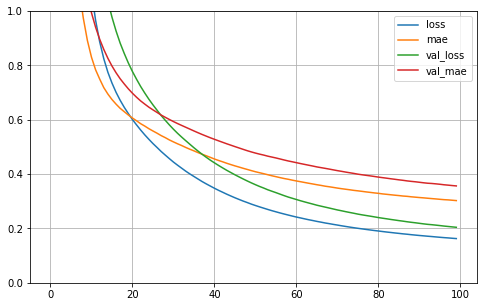

In [26]:
# plotting the model history

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [27]:
del model

In [28]:
keras.backend.clear_session()

In [29]:
model = keras.models.load_model("movie_revenue_pridction_model.h5")

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                600       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 1,561
Trainable params: 1,561
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 6ms/step - loss: 0.2473 - mae: 0.3684


[0.2472868710756302, 0.3683830499649048]

In [32]:
X_new = X_test[:5]
X_new

array([[-0.44266208, -1.02614886,  0.38963381,  0.17868888,  0.53249944,
         0.51973978,  0.49371081,  0.54760731,  0.56866681, -0.29573723,
         0.24587303,  1.2119233 , -1.47737723,  1.65755423, -0.06831227,
         0.83094897, -0.72586619, -0.50659369,  1.48020648],
       [-0.4472429 , -0.69071378,  0.92307081,  0.66563386, -1.30219665,
        -0.07919485, -0.13613263, -0.16729666, -0.04627728,  0.8956014 ,
         0.86778136,  1.68205187, -0.21397019, -0.67366446, -1.12199413,
        -1.20344334,  1.37766439, -0.50659369, -0.67558142],
       [-0.44085257,  2.34099388, -0.44862433, -0.43782334,  1.05925789,
         0.92200931,  0.88680459,  0.86287552,  0.85145132, -1.33815853,
        -0.98658199, -0.48441691,  0.91469946,  0.69291202,  0.14427266,
        -1.20344334, -0.72586619, -0.50659369,  1.48020648],
       [-0.44268023, -0.06532636,  1.21095744, -0.32107045, -2.20162774,
        -0.64237218, -0.57389615, -0.71346553, -0.65673272, -1.07010734,
         0.723

In [33]:
y_pred = model.predict(X_new)

In [34]:
print(y_pred) # predicted_y

[[2.4928281]
 [2.4419906]
 [1.7999651]
 [2.3888502]
 [1.5561042]]


In [35]:
print(y_test[:5]) # actual_y

     Collection
173    2.240000
274    2.826667
491    1.573333
72     2.186667
452    1.740000
